In [10]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import os
import sys

# Below paths: bad but managable

# for our_lib
module_path = os.path.abspath(os.path.join('./our_lib')) # or the path to your source code
print(module_path)
sys.path.append(module_path)

# for recsys2025
# module_path = os.path.abspath(os.path.dirname(os.path.abspath(__file__)).join('../../.'))
module_path = os.path.abspath(os.path.join('../.')) # or the path to your source code
sys.path.append(module_path)
module_path = os.path.abspath(os.path.join('../recsys2025')) # or the path to your source code
sys.path.append(module_path)


# from our_lib import *
from our_lib import RecSysData
# from our_lib import split_data, create_baseline_embeddings, contest_training
# from our_lib import validate_and_load_embeddings  

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/zmrocze/studia/uwr/sem2/adm/projekt/src/our_lib


In [11]:
import pandas as pd

data_path = '../ubc_data_relevant'

# Load the dataframes from parquet files
add_to_cart = pd.read_parquet(f'{data_path}/add_to_cart.parquet')
page_visit = pd.read_parquet(f'{data_path}/page_visit.parquet')
product_buy = pd.read_parquet(f'{data_path}/product_buy.parquet')
product_properties = pd.read_parquet(f'{data_path}/product_properties.parquet')
remove_from_cart = pd.read_parquet(f'{data_path}/remove_from_cart.parquet')
search_query = pd.read_parquet(f'{data_path}/search_query.parquet')

print(f"Add to cart shape: {add_to_cart.shape}")
print(f"Page visit shape: {page_visit.shape}")
print(f"Product buy shape: {product_buy.shape}")
print(f"Product properties shape: {product_properties.shape}")
print(f"Remove from cart shape: {remove_from_cart.shape}")
print(f"Search query shape: {search_query.shape}")
# Display the first few rows of each dataframe
print("\nAdd to cart sample:")
print(add_to_cart.head())
print("\nPage visit sample:")
print(page_visit.head())
print("\nProduct buy sample:")
print(product_buy.head())
print("\nProduct properties sample:")
print(product_properties.head())
print("\nRemove from cart sample:")
print(remove_from_cart.head())
print("\nSearch query sample:")
print(search_query.head())

Add to cart shape: (2654264, 3)
Page visit shape: (41919050, 3)
Product buy shape: (1218423, 3)
Product properties shape: (831550, 4)
Remove from cart shape: (1138370, 3)
Search query shape: (4212745, 3)

Add to cart sample:
   client_id            timestamp      sku
0   17649961  2022-08-11 12:22:55  1398840
1   16696114  2022-07-11 16:27:00    81192
2   10238779  2022-10-05 14:36:55  1475246
3   10238779  2022-10-05 14:36:55  1475246
4   10238779  2022-10-05 14:38:10  1475246

Page visit sample:
   client_id            timestamp       url
0   17649961  2022-08-25 15:57:30  14059211
1   17649961  2022-08-25 15:57:30  11281868
2   17649961  2022-08-25 15:57:30   8399994
3   17649961  2022-08-25 15:57:30   3137264
4   17649961  2022-08-25 15:57:30   3137264

Product buy sample:
   client_id            timestamp     sku
0   17649961  2022-07-23 20:15:25   18485
1   16696114  2022-07-11 16:31:30   81192
2   10238779  2022-05-29 19:35:40  510014
3   10238779  2022-05-29 19:38:05  510014
4 

In [12]:
# load everything
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load propensity data from .npy files
propensity_sku = np.load(f'{data_path}/target/propensity_sku.npy')
propensity_category = np.load(f'{data_path}/target/propensity_category.npy')
relevant_users = np.load(f'{data_path}/input/relevant_clients.npy')

print("Propensity SKU shape:", propensity_sku.shape)
print("Propensity Category shape:", propensity_category.shape)

Propensity SKU shape: (100,)
Propensity Category shape: (100,)


In [3]:
fulldata = RecSysData(
    add_to_cart,
    page_visit,
    product_buy,
    product_properties,
    remove_from_cart,
    search_query
  )

fulldata

RecSysData(
  add_to_cart=2654264,
  page_visit=41919050,
  product_buy=1218423,
  product_properties=831550,
  remove_from_cart=1138370,
  search_query=4212745,
  all users: 1000000,
  all products: 831550
  all urls: 6171078,
)

In [4]:
df_with_user = ['add_to_cart', 'page_visit', 'product_buy', 'remove_from_cart', 'search_query']

In [7]:
# Get users with only one interaction for each dataframe
for df_name in df_with_user:
  df = fulldata.__getattribute__(df_name)
  user_interaction_counts = df['client_id'].value_counts()
  single_interaction_users = set(user_interaction_counts[user_interaction_counts == 1].index)
  
  # Add is_single column
  df['is_single'] = df['client_id'].isin(single_interaction_users)
  
  print(f"{df_name}: {df['is_single'].sum()} single interactions out of {len(df)} total")

fulldata.add_to_cart

add_to_cart: 248374 single interactions out of 2654264 total
page_visit: 80566 single interactions out of 41919050 total
product_buy: 268552 single interactions out of 1218423 total
remove_from_cart: 158344 single interactions out of 1138370 total
search_query: 61677 single interactions out of 4212745 total


,client_id,timestamp,sku,is_single
0,17649961,2022-08-11 12:22:55,1398840,True
1,16696114,2022-07-11 16:27:00,81192,True
2,10238779,2022-10-05 14:36:55,1475246,False
3,10238779,2022-10-05 14:36:55,1475246,False
4,10238779,2022-10-05 14:38:10,1475246,False
...,...,...,...,...
2654259,4284680,2022-08-22 20:43:05,368528,False
2654260,4284680,2022-08-22 20:47:10,368528,False
2654261,23427530,2022-08-19 04:57:00,129157,True
2654262,21035979,2022-09-02 12:35:25,965617,True



add_to_cart - Daily interaction counts:
Total days: 141
Average daily multi-user interactions: 17063.05
Average daily single-user interactions: 1761.52
            multi_user  single_user
date                               
2022-05-23       16646         2412
2022-05-24       16600         2286
2022-05-25       16783         2211
2022-05-26       13942         1879
2022-05-27       10470         1532

page_visit - Daily interaction counts:
Total days: 141
Average daily multi-user interactions: 296726.84
Average daily single-user interactions: 571.39
            multi_user  single_user
date                               
2022-05-23      281428          846
2022-05-24      292028          788
2022-05-25      296433          813
2022-05-26      249332          724
2022-05-27      202283          649

product_buy - Daily interaction counts:
Total days: 141
Average daily multi-user interactions: 6736.67
Average daily single-user interactions: 1904.62
            multi_user  single_user
dat

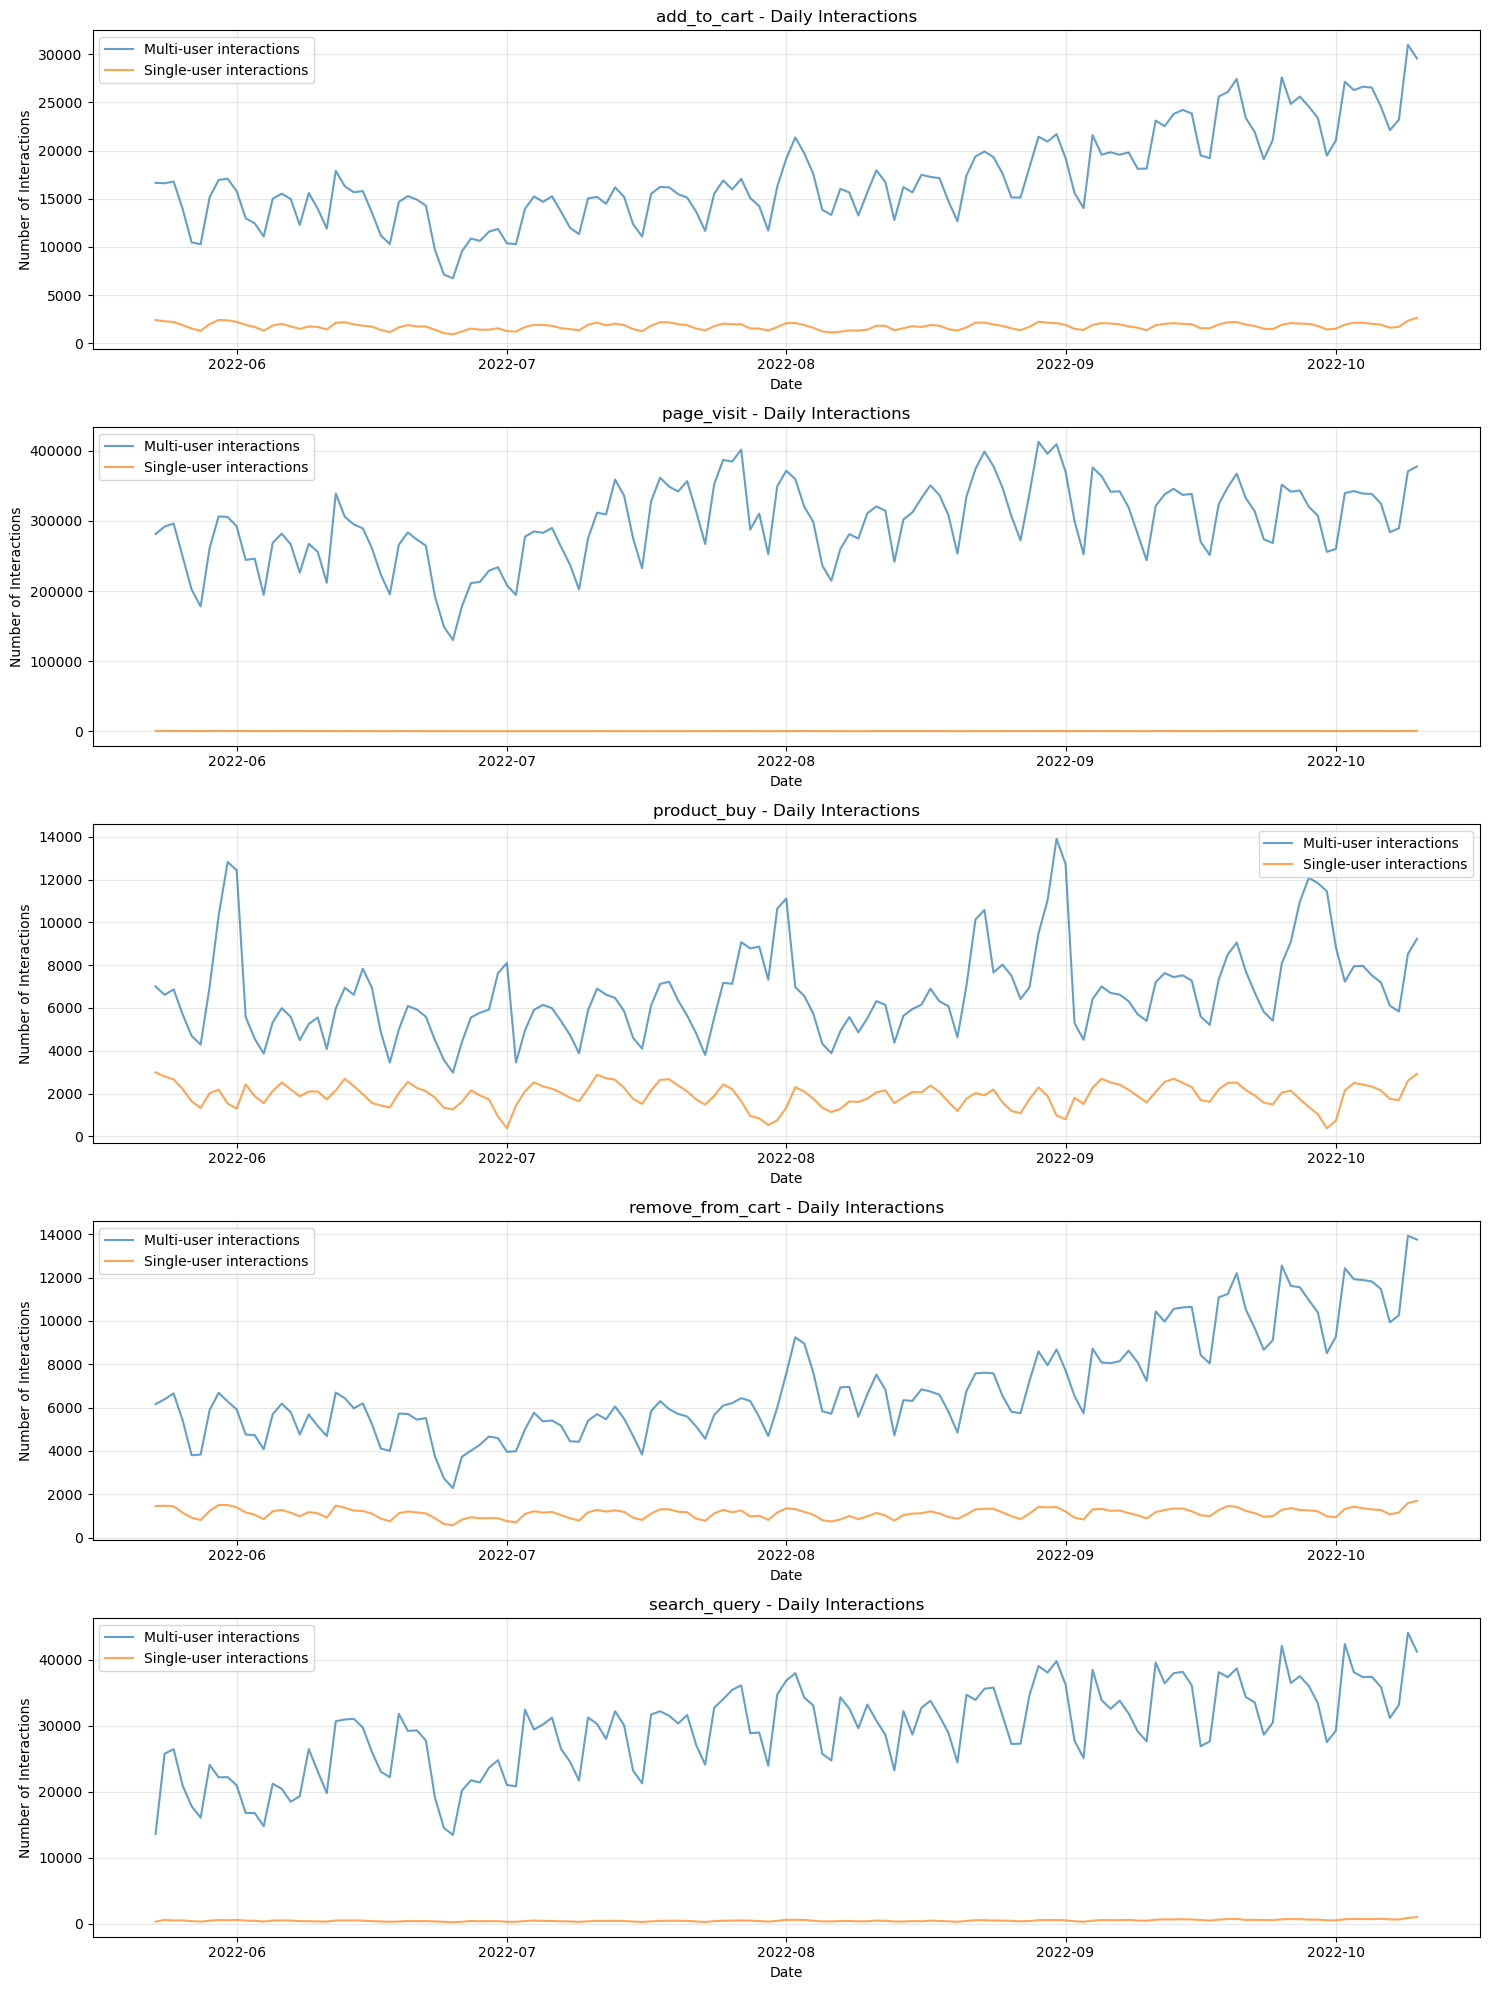

In [8]:
import matplotlib.pyplot as plt

# Convert timestamp to datetime and extract date for all dataframes
for df_name in df_with_user:
  df = fulldata.__getattribute__(df_name)
  df['timestamp'] = pd.to_datetime(df['timestamp'])
  df['date'] = df['timestamp'].dt.date

# Calculate daily interaction counts for each dataframe
daily_stats = {}

for df_name in df_with_user:
  df = fulldata.__getattribute__(df_name)
  
  # Group by date and is_single, count interactions
  daily_counts = df.groupby(['date', 'is_single']).size().unstack(fill_value=0)
  daily_counts.columns = ['multi_user', 'single_user']
  
  daily_stats[df_name] = daily_counts
  
  print(f"\n{df_name} - Daily interaction counts:")
  print(f"Total days: {len(daily_counts)}")
  print(f"Average daily multi-user interactions: {daily_counts['multi_user'].mean():.2f}")
  print(f"Average daily single-user interactions: {daily_counts['single_user'].mean():.2f}")
  print(daily_counts.head())

# Plot the daily interaction counts
fig, axes = plt.subplots(len(df_with_user), 1, figsize=(15, 20))

for i, df_name in enumerate(df_with_user):
  daily_counts = daily_stats[df_name]
  
  axes[i].plot(daily_counts.index, daily_counts['multi_user'], label='Multi-user interactions', alpha=0.7)
  axes[i].plot(daily_counts.index, daily_counts['single_user'], label='Single-user interactions', alpha=0.7)
  axes[i].set_title(f'{df_name} - Daily Interactions')
  axes[i].set_xlabel('Date')
  axes[i].set_ylabel('Number of Interactions')
  axes[i].legend()
  axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
propensity_category

array([3068, 5954, 3147, 3944, 2739, 5476, 4142, 6839, 4981, 6440, 1586,
       5594, 2235, 3031, 1681, 6771, 4195, 1097, 4715, 5323, 2910, 1745,
       3263, 3421, 3061, 5427, 4062, 2855, 2977, 5268, 5152, 1081, 3709,
        874, 4519, 1543,  605, 1560,  682, 4631, 4686, 1399, 2405, 3953,
       2651,  315, 6857, 2027, 3296, 5536, 5641, 3320, 4383,  827, 5349,
       1386, 1421, 4517, 6393, 4564, 5562, 4987,  593, 3452, 4628, 2392,
       6899, 2079, 3698, 4750, 4041, 4681, 6508, 1863, 2036, 5077, 3827,
       2450, 3787, 3768, 4298, 4545,  702, 4848, 3079, 4462,  155, 6821,
        831, 2008,   93, 6214,  424, 2329, 6337, 2527, 6283, 1677, 1541,
       4032])

In [16]:
# Get all unique product categories
all_categories = product_properties['category'].unique()
print(f"Total number of unique product categories: {len(all_categories)}")
print(f"Product categories range from {all_categories.min()} to {all_categories.max()}")
print(f"\nFirst 20 categories: {all_categories[:20]}")

Total number of unique product categories: 6384
Product categories range from 0 to 6918

First 20 categories: [6350 4750 3500 1745 4195 5641  874 5740 1595 2977 4480 6909 5268 4340
 1290 1518 1870 4370 3181  593]


In [25]:
def get_category_counts(df, propensity_category):
  # Calculate interaction frequency by category for each user in add_to_cart
  user_category_interactions = {}

  # Get the categories from propensity_category
  target_categories = set(propensity_category)

  # Merge add_to_cart with product_properties to get categories
  add_to_cart_with_category = add_to_cart.merge(
    product_properties[['sku', 'category']], 
    on='sku', 
    how='left'
  )
  add_to_cart_filtered = add_to_cart_with_category[
    add_to_cart_with_category['category'].isin(target_categories)
  ]
  user_category_counts = add_to_cart_filtered.groupby(['client_id', 'category']).size().reset_index(name='interaction_count')
  user_category_matrix = user_category_counts.pivot(
    index='client_id', 
    columns='category', 
    values='interaction_count'
  ).fillna(0)

  user_category_matrix = user_category_matrix.astype(int)

  print(f"Updated user-category interaction matrix shape: {user_category_matrix.shape}")
  print("\nSample of user-category interactions (as integers):")
  return user_category_matrix

# Get the user-category interaction matrix
user_category_matrix = get_category_counts(add_to_cart, propensity_category)
print(user_category_matrix.sum().sum(), len(user_category_matrix), user_category_matrix.sum().sum() / (len(user_category_matrix)* len(propensity_category)))
user_category_matrix

Updated user-category interaction matrix shape: (295377, 100)

Sample of user-category interactions (as integers):
958847 295377 0.03246180305169326


category,93,155,315,424,593,605,682,702,827,831,...,6283,6337,6393,6440,6508,6771,6821,6839,6857,6899
client_id,,,,,,,,,,,,,,,,,,,,,
28,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
36,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
283,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
284,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23874698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23874702,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23874740,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def frequency_based_quantile_transform(values, n_bins=10):
  """
  Transform values to float between 0 and 1 using frequency-based binning.
  Each bin contains approximately the same number of observations.
  
  Parameters:
  values: array-like, the values to transform
  n_bins: int, number of bins to create
  
  Returns:
  numpy array of transformed float values between 0 and 1
  """
  values = np.array(values)
  
  # Calculate quantiles for equal-frequency binning
  quantiles = np.linspace(0, 100, n_bins + 1)
  
  nonzero_indices = np.nonzero(values)
  nonzero = values[nonzero_indices]
  
  bin_edges = np.percentile(nonzero, quantiles)
  bin_indices = np.searchsorted(bin_edges[1:], values, side='right')
  
  transformed = bin_indices / (n_bins - 1)
  
  binnns = np.zeros_like(transformed)
  np.put(binnns, nonzero_indices, transformed)
  not_zeros = (values != 0)
  res = np.stack((not_zeros, binnns), axis=1)

  return res.astype(float)

print("Example quantities:", example_quantities)
print("Quantile transform:", frequency_based_quantile_transform(example_quantities, n_bins=10))

Example quantities: [0 0 0 ... 0 0 0]
Non-zero values: (array([       8,      150,      212, ..., 29537482, 29537593, 29537659]),)
Non-zero values: [1 1 2 ... 1 1 1]
Binned values: [0. 0. 0. ... 0. 0. 0.]
[False False False ... False False False]
Quantile transform: [[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [42]:
qu = frequency_based_quantile_transform(example_quantities, n_bins=10)
list(example_quantities)

Non-zero values: (array([       8,      150,      212, ..., 29537482, 29537593, 29537659]),)
Non-zero values: [1 1 2 ... 1 1 1]
Binned values: [0. 0. 0. ... 0. 0. 0.]
[False False False ... False False False]


[np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.in